[Back to Table of Contents](https://www.shannonmburns.com/Psyc158/intro.html)

[Previous: Chapter 13 - Multivariable Models](https://colab.research.google.com/github/smburns47/Psyc158/blob/main/chapter-13.ipynb)

In [1]:
# Run this first so it's ready by the time you need it
install.packages("supernova")
install.packages("ggformula")
library(supernova)
library(ggformula)

Installing package into ‘/Library/Frameworks/R.framework/Versions/4.2-arm64’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpNGTuMu/downloaded_packages


Installing package into ‘/Library/Frameworks/R.framework/Versions/4.2-arm64’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpNGTuMu/downloaded_packages


Loading required package: ggplot2

Loading required package: ggstance


Attaching package: ‘ggstance’


The following objects are masked from ‘package:ggplot2’:

    geom_errorbarh, GeomErrorbarh


Loading required package: scales


Attaching package: ‘scales’


The following object is masked from ‘package:supernova’:

    number


Loading required package: ggridges


New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")



# Chapter 14 - Models with Moderation

## 14.1 Independence vs. interaction

In all the modeling we've done so far, we've relied on the general *linear* model to combine the effects of predictors in order to make a guess about the value of an outcome. This *linear* keyword means we have combined them with addition in the model equation. It implies that we think each predictor can contribute to explaining variance in the outcome with an effect b, *regardless* of the value of any other predictor. 

<img src="images/ch14-linearmod.png" width=500>

In a data generation process, we would call these predictors **main effects**. The effect of each predictor is independent of any other. 

However, this isn't always how the data generation process works. Not everything in the world is combined linearly and independently. For example, consider [this work](https://journals-sagepub-com.ccl.idm.oclc.org/doi/full/10.1111/j.1467-9280.2008.02079.x?casa_token=vmfXzncR8pQAAAAA:B9g_7Z1Pm67d_CCN-UDohTeFlDNC0Ci9GJ-qbZaOmw_DChwntgmzU7FJq2WYQOXzSBvD8iotqIUk) on how men and women are treated differently for expressing anger in the workplace. When men show anger in response to a problem, they are conferred higher status. A simple conceptual model of this phenomenon then might have anger expressions explaining workplace status.

But this work showed that the effect is different for women. When women show anger during a problem, they are conferred less workplace status and may even be punished for it ("she's being irrational"). Thus the nature of the effect of anger expression on explaining workplace status depends on whether or not someone presents as male or female. 

<img src="images/ch14-interactionmod.png" width=500>

This is an example of an **interaction** between the variables of gender and anger expressions. The effect of anger on workplace status is not the same in all situations; it is not independent of other variables. The effect changes based on the context of another variable, gender.  

We need more than addition to be able to build this sort of situation into a model. In other words, the model is not linear. But if we think a data generation process in psychology is not linear, is that a fatal flaw in using the general linear model framework? 

It turns out that the answer is no! The general linear model always combines things linearly. But we can use some tricks of math to turn nonlinear relationships into linear ones. In this chapter we'll learn how to do this.


## 14.2 Specifying an interaction model

First, let's review multivariable models, and then learn the differece between specifying main effects versus interactions. 

Suppose that there is a drug being tested in a clinical trial to reduce excess cholesterol. Suppose we are expecting a linear dose-response effect such that the higher the dose of the drug, the less excess cholesterol someone has:
 
<img src="images/ch14-lineardrug.png" width="450">

Now, however, suppose that we expect male subjects to have an overall higher level of compared to female subjects, but that the drug will still help both groups of subjects in the same way. In this situation, graph may look like this:

<img src="images/ch14-maineffectdrug.png" width="450">

This is the multivariable situation we have worked with before. Both of these effects are main effects because the effect is present and the same strength no matter the value of the other variable. The **simple slope** lines (the regression line for just one sex condition) have the same slope, and there is always the same distance between predicted values of cholesterol for male and female subjects no matter the drug dose.  

However, maybe male and female subjects actually react differently to the drug dosage, like this:

<img src="images/ch14-interactiondrug1.png" width="450">

In this situation, being female makes the drug work better. There is a steeper simple slope for female subjects, such that a 1-unit increase in drug dosage results in a larger drop in cholesterol than the same 1-unit increase in drug dosage for male subjects.

On the other hand, if the drug works less well in female subjects, they would have a shallower dose-response line compared to male subjects, like this:

<img src="images/ch14-interactiondrug2.png" width="450">

Of these four graphs, the first indicates no difference in cholesterol between male and female subjects - there is only an effect of drug dose. This is a simple linear regression with one predictor. 

The second graph illustrates that there is a difference in expected excess cholesterol between male and female subjects and also an expected change in cholesterol level for each 1-unit increase in drug dose. But these effects do not influence each other - taking an increasingly stronger drug will help male and female subjects the same amount. There are only main effects of drug dose and sex. 

The third and fourth graphs represent situations with an **interaction**. The effect of drug dose (the slope of the regression line) changes depending on the value of another variable, sex. In this case, the change in predicted cholesterol for every one-unit increase of the drug dose depends on whether it is given to male or female subjects. 

In terms of regression equations, we have:

**Simple regression, main effect of dose:** 

$$cholesterol_i = b_0 + b_1dose_i + e_i$$

where Y represents the outcome (amount of excess cholesterol), $b_0$ is the expected cholesterol when dose = 0, and $b_1$ is the difference in expected cholesterol for every one-unit increase in drug dose.

**Multiple regression, main effects of dose and sex:** 

$$cholesterol_i = b_0 + b_1dose_i + b_2sex_i + e_i$$

where Y represents the outcome (amount of excess cholesterol), $b_0$ is the expected cholesterol when dose = 0 and sex = 0 (i.e., dose = 0 in the reference group), $b_1$ is the difference in expected cholesterol for every one-unit increase in drug dose regardless of sex, and $b_2$ is the change in expected cholesterol between male and female regardless of dose. The dose and sex components are included linearly in this equation - they are added together. By doing this, we are hypothesizing that the effect of dose is the same regardless of sex, and vice versa. 

To write an equation for the situation with an interaction, we need a way to modify the strength of the effect of dose depending on what sex value someone has. In this way, someone who is male can have a different effect of dose than someone who is female.

Remember that the coefficient b is the effect of a variable. We multiply it by the value of the variable to create predictions. Multiplication enables us to modify our predictions based on the value of the predictor. Therefor, if we want to modify the value of a b coefficient, we can multiply it *also* by the value of a *second* predictor:

**Multiple regression, interaction between dose and sex:** 

$$cholesterol_i = b_0 + b_1dose_i + b_2sex_i + b_3dose_i*sex_i + e_i$$

In this equation, we're adding a component to our model that will change our predictions depending on the value of both effects.

In an interaction, it's not possible to interpret the strength of the effect of one variable without the context of the other. It's any situation where you might say "it depends" for making predictions. Is sun exposure related to skin cancer risk? It depends on if you're wearing sunscreen or not. Does adding more mustard make food more tasty? It depends on if that food is a hot dog or ice cream (or maybe not - you do you.) 


## 14.3 Interpreting the parameter estimates 

Because of this interaction between the variables, interpreting the coefficients gets tricky. If the equation looked specifically like: 

$$cholesterol_i = 40 - 0.5dose_i + 12sex_i - 0.25dose_i*sex_i + e_i$$

you should interpret $b_0$, $b_1$, and $b_2$ in the contexts of when the other variable is 0. Here: 
- $b_0$ (the intercept) is the expected cholesterol when dose = 0 and sex = 0. If "female" is the reference group, then this would be the expected cholesterol for someone who is female and who has not received any drug. 
- $b_1$ (the main effect of dose) is the expected change in cholesterol lowering for every one-unit increase in dose, *when sex = 0* (i.e., for the reference group of female). 
- $b_2$ (the main effect of sex) is the expected change in cholesterol when you cross from the female to male category, *when dose = 0*. 

Now, let's get to $b_3$ (the interaction coefficient). Think of this as the change in a *main effect*, for every one-unit increase of another variable. For our case, we could say for every one-unit increase in dose, the difference in predicted cholesterol between females and males is decreasing by 0.25 ($b_3$ = -0.25). Male subjects start with higher predicted cholesterol for the same dose of the drug, but as the drug dose increases they will eventualy be predicted to have a lower cholesterol level than female subjects. In this perspective, we would consider drug dose to be a **moderator** of the effect of sex. The dose of the drug is changing the difference between sex groups. 

In the pictures above, a negative interaction term means the distance between lines for levels 0 and 1 of the sex variable is shrinking (or flipping negative) as you move up the x-axis. A positive interaction term means the distance between lines for levels 0 and 1 is growing (or flipping positive) as you move up the x-axis. The magnitude of the interaction term describes the speed at which that is happening. 

You can also interpret an interaction coefficient the other way around: by switching consideration from female to male subjects, we expect the difference in cholestrol between a dose of 0 and a dose of 1 to be 0.25 less. I.e., the simple slope of male subjects is 0.25 less than the simple slope of female subjects (since female subjects have a negative slope, this means the male subject line has an even more negative slope). In this perspective, we would consider sex to be a moderator of the effect of drug dose. The sex of a participant is changing the effect of the drug. When building interaction models, it doesn't matter which variable you consider to be the moderator. Just make sure you interpret the meaning of the coefficient correctly depending on what you choose.  

Coefficient interpretation is more complicated for interaction models than main effect models. And it takes a lot of words to write out. But it's important to practice fully writing out what you expect to happen to your predictions under different values of the explanatory variables in concrete terms, not just saying things like "negative interaction effect between dose and sex." That statement is removed from the units and real-world meaning of the variables. When interpreting coefficients, we want to stay as close to the real units as we can so that we keep sight of how important these prediction changes are in a practical sense.


## 14.4 Interactions between two categorical variables

Let's do some more interpretation practice, this time with the study that we opened this chapter with - emotional reaction and gender interacting to determine how much status someone is conferred.

In this study, the researchers gave participants vignette stories about the way hypothetical people reacted to a problem at work. In these stories, the gender and reaction of the target person varied. This target was either portrayed as a man or a woman, and their reaction was described as either one of anger or one of sadness. Participants were then asked several questions about much status, power, hiring potential, and independence the target deserved at work (all combined into one outcome variable, "status conferral", ranging from 1 to 11). 

In this case, the outcome variable is how much status participants think the target should be conferred. There are two predictor variables - target's gender and target's reaction. Both of these predictors are categorical, because they represent qualitatively different categories. 

As we've learned in previous chapters, there is no difference in the form of the statistical equation for representing categorical vs. quantitative predictor variables. All that changes is the interpretation of the coefficients.

Let's say the best-fitting equation for this study is:

$$status_i = 3.7 + 2.5gender_i + 1.2reaction_i - 3.4gender_i*reaction_i + e_i$$

Visually, this would look like:

<img src="images/ch14-reactionmod.png" width="800">

To understand what each coefficient means, start with the simplest situation, when the value of every variable is 0 (in this case, the reference group for both predictors). If the reference group of gender is "female" and the reference group of reaction is "anger" (the blue bar on the left), then putting those values into the equation would reduce it to $status_i = 3.7$. That means we would predict a status value of 3.7 for targets who are female and react with anger. This is the predicted outcome value for a target in both reference groups. 

Now let's change one of the variable values, but leave the other at 0. For instance, what is the predicted status value for a male who reacts with anger? Inserting 1 for the value of gender and 0 for the value of reaction would make the equation $status_i = 3.7 + 2.5 = 6.2$. Males who react with anger (blue bar on the right) are predicted to be rated with a value of 6.2 for their status. The value $b_1 = 2.5$ thus means the predicted difference in status for women and men when reaction = 0. Since this coefficient is positive, that means men (gender = 1) are conferred higher status than women (gender = 0) when reacting with anger.

Let's switch the situation, and this time consider a woman (gender = 0) who reacts with sadness (reaction = 1). This equation would reduce to $status_i = 3.7 + 1.2 = 4.9$. Women who react with sadness (orange bar on the left) are predicted to given a status rating of 4.9. Since this $b_2$ coefficient is positive, that means women who react with sadness (reaction = 1) are conferred higher status than women who react with anger (reaction = 0). 

Finally, consider the situation for a man (gender = 1) who reacts with sadness (reaction = 1). Neither of these predictor values are 0, so we have to use the full equation: $status_i = 3.7 + 2.5 + 1.2 - 3.4 = 4$. Men who react with sadness are conferred a status level of 4. Since this $b_3$ coefficient is negative, we need to interpret it as one variable moderating the effect of the other in such a way that decreases the value of that effect. If we think about reaction as the moderator, this means the simple slope for men is 3.4 more negative than the simple slope for females. If we think about gender as the moderator, this means the simple slope for sadness is 3.4 more negative than for anger. 

Depending on which variable you choose as the moderator, it can be helpful to plot that as different lines: 

<img src="images/ch14-genderreactionmod.png" width="800">


## 14.5 Interactions between two quantitative variables

Let's go back to the cholesterol example, but with age and dose as predictor variables. Notice that this means we have two quantitative variables. The equation form of this model with an interaction would be, just as before:

$$cholesterol_i = b_0 + b_1dose_i + b_2age_i + b_3dose_i*age_i + e_i$$

Before, when at least one of the predictor variables was categorical, we could interpret the interaction effect $b_3$ as the difference in effects between one group and another. How do we interpret this coefficient when all variables are quantitative and there are no groups?

Even though age will be treated as a quantitative variable here, suppose for an instant it was coded as dichotomous, simply representing “old” and “young” subjects. Now we would be back to the case already discussed above in detail, and the graph would look something like this:

<img src="images/ch14-interactionage2.png" width="450">

In this hypothetical case, we see that young people are expected to have less cholesterol than old people, but as drug dose increases, their cholesterol is reduced at a slower rate than for old people. The effect of dose on cholesterol (the simple slope) in young people is weaker than the effect in old people. What if we now add a middle category of “middle aged” people? The graph may now look something like this:

<img src="images/ch14-interactionage3.png" width="450">

And if even more categories of age were added, we might get something like this:

<img src="images/ch14-interactionagemany.png" width="450">

Now imagine adding finer and finer age categories, slowly transforming the age variable from discrete (categorical) into a continuous variable. At the point where age becomes continuous, we would have an infinite number of different slopes, one for each of the infinite possible age values. This is what we have when we have a model with two quantitative variables that interact with each other.

Let's put in some exact numbers for the coefficients and interpret what they mean in this context:

$$Y_i = 40 - 1dose_i + 0.5age_i + 0.01dose_i*age_i + e_i$$

This means that the effect of dose changes depending on the age of the subject, so that there is really no one effect of dose. It is different for each possible age value. For someone aged 30, their specific model is:

$$\hat{Y} = 40 - 1dose_i + 0.5*30 + 0.01dose_i*30 = 55 - 0.7dose_i$$

For someone aged 60, the simple model is: 

$$\hat{Y} = 40 - 1dose_i + 0.5*60 - 0.01dose_i*60 = 70 - 0.4dose_i$$

This means that the cholesterol drug has a stronger effect on people aged 60 than people aged 30. 

The effect of age is similarly affected by dose. If dose = 0, then the simple model of age on cholesterol is:

$$\hat{Y} = 40 - 1*0 + 0.5age_i + 0.01*0*age_i = 40 + 0.5age_i$$

If the dose is 20, the simple model is: 

$$\hat{Y} = 40 - 1*20 + 0.5age_i + 0.01*20*age_i = 20 + 0.7age_i$$

I.e., age has a stronger effect on cholesterol with larger doses.


## 14.6 Fitting an interaction model 

To fit an interaction model in R, we need to specify an interaction as part of the model formula when using ```lm()```. Recall how we would fit a multivariable model with just main effects:

In [18]:
brescoll2008 <- read.csv("https://raw.githubusercontent.com/smburns47/Psyc158/main/brescoll2008_sim.csv")

maineffect_model <- lm(status_conferral ~ target_gender + target_reaction, data = brescoll2008)

maineffect_model


Call:
lm(formula = status_conferral ~ target_gender + target_reaction, 
    data = brescoll2008)

Coefficients:
           (Intercept)       target_gendermale  target_reactionsadness  
                4.5656                  0.6150                 -0.3504  


Here, because we used a formula ```status_conferral ~ target_gender + target_reaction```, we've told R to find the best-fitting coefficients that match that kind of data generation process - one where the effect of each variable has no impact on the effect of the other. 

In this formula, the combination of the predictor variables looks the same as the combination of predictor variables in the equation form. We are simply using addition. To specify an interaction formula then, we can use addition and multiplication, like in the equation:

In [19]:
interaction_model <- lm(status_conferral ~ target_gender + target_reaction + target_gender*target_reaction, 
                        data = brescoll2008)

interaction_model


Call:
lm(formula = status_conferral ~ target_gender + target_reaction + 
    target_gender * target_reaction, data = brescoll2008)

Coefficients:
                             (Intercept)  
                                   3.820  
                       target_gendermale  
                                   2.129  
                  target_reactionsadness  
                                   1.130  
target_gendermale:target_reactionsadness  
                                  -2.995  


This code gives us 4 coefficients, as expected: 1 for the intercept, 2 for the main effects of each separate predictor, and one for the interaction effect ('target_gendermale:target_reactionsadness'). 

Actually, R gives us an even easier way to specify the formula for an interaction. Consider the below formula:

In [21]:
interaction_model <- lm(status_conferral ~ target_gender*target_reaction, data = brescoll2008)

interaction_model


Call:
lm(formula = status_conferral ~ target_gender * target_reaction, 
    data = brescoll2008)

Coefficients:
                             (Intercept)  
                                   3.820  
                       target_gendermale  
                                   2.129  
                  target_reactionsadness  
                                   1.130  
target_gendermale:target_reactionsadness  
                                  -2.995  


In this shorter formula, we only included the interaction term ```target_gender*target_reaction```. However, it still gave us the same results number of coefficients as the longer formula. This is because, if you provide an interaction term, R assumes you also want coefficient estimates for all the other terms in the GLM equation. Just like you don't have to specify an intercept term in a formula for a regression, you don't have to specify the main effect terms in a formula for an interaction. 

Notice that even though we know an interaction is involved in the data generation process of status conferral, R can still fit the main effects model ```target_gender + target_reaction``` if that is how we specify the formula. R will take whatever formula we give it and find the best-fitting coefficients for that formula, regardless of whether or not that is the real data generation process. 

Also notice that between the main effects model and the interaction model, the coefficient estimates for the individual predictors are different. With different formulas come different best-fitting coefficients. In the main effects model, what we essentially did is calculate the average effect of gender for every emotional reaction, and vice versa:

<img src="images/ch14-averageeffect.png" width="800">

This means that, on average, men are conferred higher status than women and anger expression are conferred higher status than sadness expressions.

If this was the true data generation process and the variables didn't interact, this average effect is what the slope would look like for both categories of the moderator. There would be no difference between the simple slopes, meaning the interaction coefficient $b_3$ would be 0 and would drop out of the model, leaving only the main effects in place. If $b_3$ is nonzero, that means there is a difference in the simple slopes and therefor a difference in the effect of one variable depending on the value of another variable.


## 14.7 Error in interaction models

As we discussed last chapter, adding more terms to a statistical equation makes it less parsimonious. The less parsimonious a model is, the greater risk there is that you're overfitting to your data. Therefor, adding more parameters needs to buy us a reduction in model error in order to be worth it. 

We can partition the error in an interaction model with an ANOVA table the same way we do with simpler models. Use the ```supernova()``` function in the code cell below to partition the error in the ```interaction_model``` object.

In [20]:
#use supernova() to create an ANOVA table for interaction_model


 Analysis of Variance Table (Type III SS)
 Model: status_conferral ~ target_gender + target_reaction + target_gender * target_reaction

                                                       SS  df      MS      F
 ----------------------------- --------------- | -------- --- ------- ------
                         Model (error reduced) |  185.710   3  61.903 19.612
                 target_gender                 |  151.830   1 151.830 48.103
               target_reaction                 |   43.758   1  43.758 13.864
 target_gender:target_reaction                 |  151.884   1 151.884 48.121
                         Error (from model)    |  842.739 267   3.156       
 ----------------------------- --------------- | -------- --- ------- ------
                         Total (empty model)   | 1028.449 270   3.809       
   PRE     p
 ----- -----
 .1806 .0000
 .1527 .0000
 .0494 .0002
 .1527 .0000
            
 ----- -----
            

All the same rows and columns are there that we've gotten used to, and we can interpret them all the same way. $SS_{total}$ tells us the total variation there is to explain in the outcome variable status_conferral. $SS_{model}$ tells us how much error is reduced by specifying the model the way we did. Each row below that also tells us the amount of error uniquely explained by including each term in the model equation. Finally, $SS_{error}$ tells us how much error is still unexplained. 

We can interpret this remaining error in terms of the units of the outcome variable, by using RMSE. In this case, RMSE is $\sqrt{3.156} = 1.78$. This means that if we use the equation $\hat{Y}_i = 3.82 + 2.129X_{1i} + 1.13X_{2i} - 2.995X_{1i}*X_{2i}$ to predict status conferral, on average our guess will be wrong by 1.78 units. 

We can also interpret error in this model by the proportion of error reduced by the model, PRE. The PRE score on the line for Model (error reduced) is 0.1806, meaning our model explains about 18% of the variation in the outcome variable.

Is this a better model than the main effects model? Does adding the interaction term improve our predictions? If a better model is defined as one with less error, this would be a better model if the RMSE for ```interaction_model``` is lower than the RMSE for ```maineffect_model``` (or if PRE is higher). Let's check that out:

In [22]:
supernova(maineffect_model)

 Analysis of Variance Table (Type III SS)
 Model: status_conferral ~ target_gender + target_reaction

                                         SS  df     MS     F   PRE     p
 --------------- --------------- | -------- --- ------ ----- ----- -----
           Model (error reduced) |   33.826   2 16.913 4.557 .0329 .0113
   target_gender                 |   25.618   1 25.618 6.903 .0251 .0091
 target_reaction                 |    8.318   1  8.318 2.241 .0083 .1355
           Error (from model)    |  994.623 268  3.711                  
 --------------- --------------- | -------- --- ------ ----- ----- -----
           Total (empty model)   | 1028.449 270  3.809                  

The RMSE score in this model is $\sqrt{3.711} = 1.93$, while the PRE score is 0.0329. This means that, by leaving out the interaction term, the predictions in ```maineffect_model``` are on average farther away from the true outcome values. More unexplained error is left on the table. The interaction model explains more error and is a better approximation of the data generation process in these data.

## 14.8 Visualizing interactions 

As you may have experienced, it was initially hard to interpret the meaning of the coefficients in an interaction model but it got easier once you could see a plot of the data, with simple slope lines for each value of the moderator. In data analysis generally it is easier for your audience to understand your results if you include visualizations, and this is especially true for complicated situations like interactions. 

For visualizing interactions, there is a handy package called ```interactions``` with functions ```interact_plot()``` for when you have at least one quantitative variable, and ```cat_plot()``` for when both predictors are categorical.

Let's practice using this package, first with some simulated data to represent the cholesterol study above.

In [7]:
#simulation for the interaction effect of sex and dose on cholesterol
set.seed(10)
dose <- runif(100, 0, 100) #uniformly distributed doses
sex <- sample(c(0,1), size=100, replace = TRUE) #random sex values
error <- rnorm(100, 0, 10) #some unexplained error 
cholesterol <- 40 - 0.4*dose + 12*sex - 0.25*dose*sex + error #the data generation process

cholesterol_data <- data.frame(cholesterol, dose, sex)

In this case we have one quantitative predictor (dose), so we will use ```interact_plot```. This function takes three arguments:

- ```model =```: a fitted model object to build the visualization of
- ```pred = ```: The name of the predictor variable to put on the x-axis
- ```modx = ```: The name of the variable to treat as the moderator (different slopes for different values)

Let's say we're interested in the moderating effect of sex on dose. Let's fit our model first:

In [8]:
#fill in the formula for fitting an interaction model between sex and dose, predicting cholesterol
cholesterol_model <- lm(#YOUR FORMULA HERE, data = cholesterol_data)

Next, we will visualize this model. Since we're thinking of sex as the moderator, let's put that variable in the ```modx = ``` argument and dose on the x-axis with ```pred = ```. 

Installing package into ‘/Library/Frameworks/R.framework/Versions/4.2-arm64’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpNGTuMu/downloaded_packages


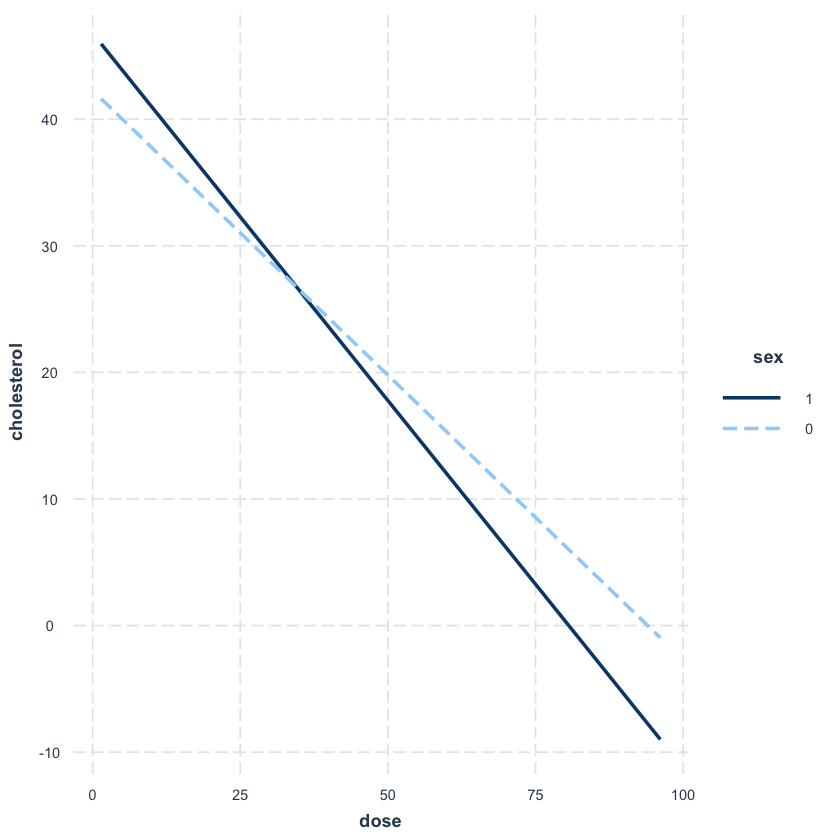

In [10]:
install.packages("interactions")
library(interactions)

#plotting interaction
interact_plot(cholesterol_model, pred = dose, modx = sex)

We now have a plot showing different simple slope lines for the effect of dose on cholesterol, for each group of sex.

Next we'll try the situation with two quantitative predictors, dose and age:

In [12]:
#simulation for the interaction effect of dose and age on cholesterol
set.seed(10)
dose <- runif(100, 0, 100) #uniformly distributed doses
age <- rnorm(100, 45, 20)  #normally distributed ages
error <- rnorm(100, 0, 10) #some unexplained error 
cholesterol <- 40 - 1*dose + 0.5*age - 0.01*dose*age + error #the data generation process

cholesterol_data <- data.frame(cholesterol, dose, age)
cholesterol_model2 <- lm(cholesterol ~ dose*age, data = cholesterol_data)

This time you try creating the visualization, with dose on the x-axis and age as the moderator.

In [ ]:
#plot the interaction between dose and age on cholesterol


Remember how we discussed there are technically no separate groups to plot lines for in a continuous moderator? That makes visualization tricky. The solution to this that the authors of ```interact_plot``` chose is to pick specific values of the moderator, and plot the simple slopes for only those values. In this case, the plot uses the value that is -1SD on the moderator variable, the mean of the moderator, and +1SD. 

Right now, this plot is pretty minimal. There are only lines, which breaks the data generation principle of showing the variation. To fix this, you can add an optional argument ```plot.points = TRUE``` to show the individual data points:

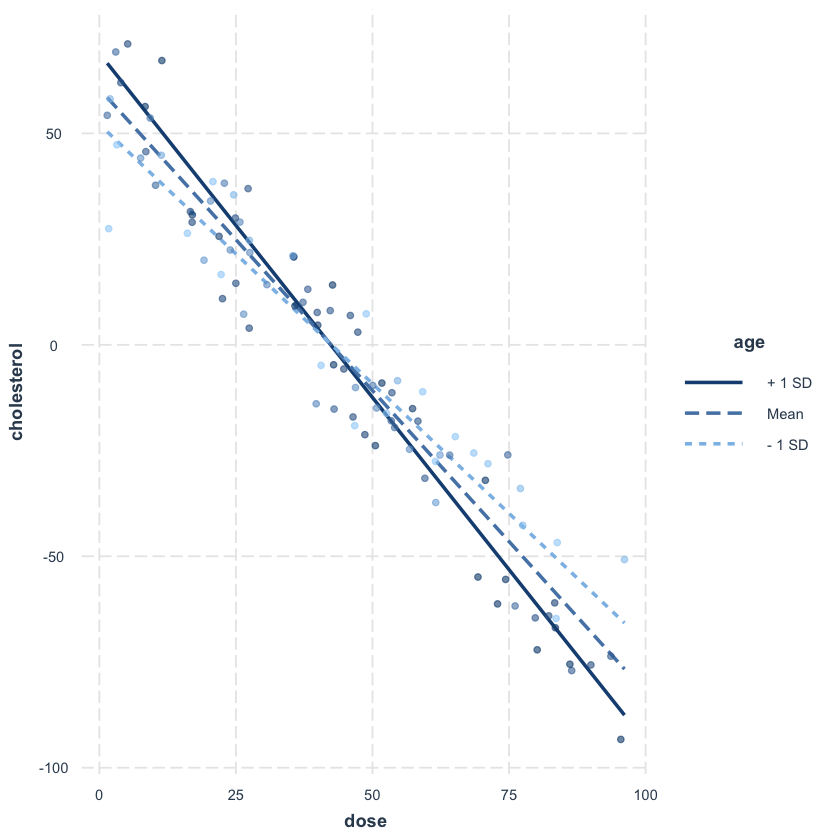

In [13]:
#plotting interaction with datapoints 
interact_plot(cholesterol_model2, pred = dose, modx = age, plot.points = TRUE)

However, if there is a lot of overlap between the groups of points, this can make the plot harder to understand rather than easier. Remember that the purpose of a visualization is to clearly communicate a conclusion you want the viewer to have. With simple models, adding the data points helps with that. But with complex models like interactions, it can be counterproductive. Always consider how well your message is coming across when you make visualization choices. In a later chapter, we'll explore a different way to express the variation in the estimated slope of a regression line without having to show all the data points.

```interact_plot()``` has a lot more features to help you control how it looks. To see more of those, visit [this page](https://cran.r-project.org/web/packages/interactions/vignettes/interactions.html). 

Finally, let's practice using ```cat_plot()``` to visualize an interaction between two categorical variables. We'll use target_gender and target_reaction from the ```brescoll2008``` dataset. ```cat_plot()``` has a different function name, but its arguments are the same as in ```interact_plot()```. 

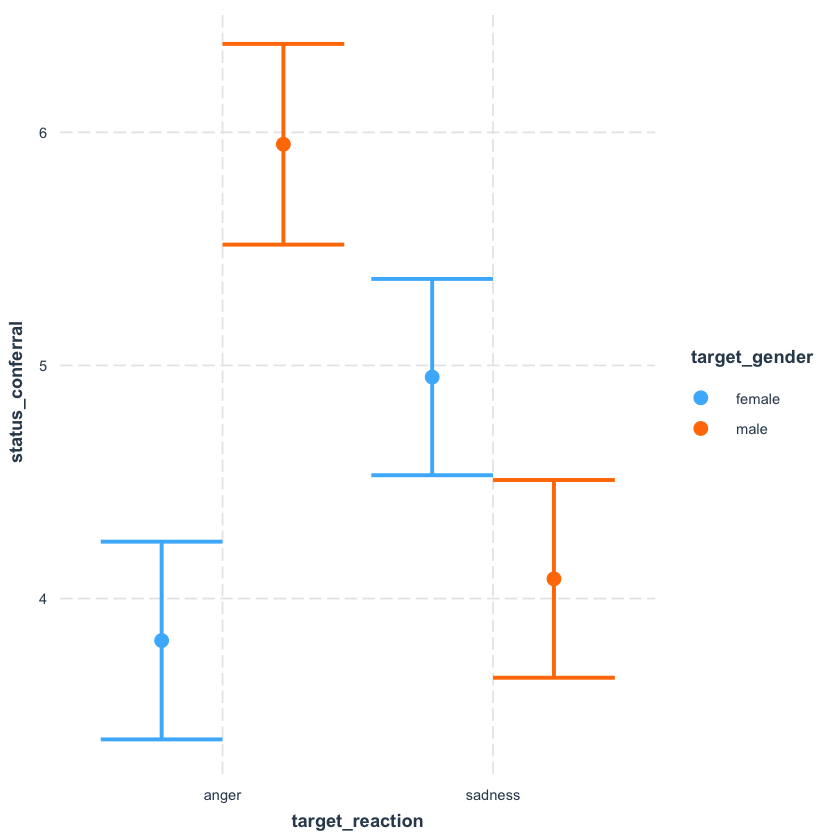

In [28]:
cat_plot(interaction_model, pred = target_reaction, modx = target_gender)

This looks a bit different that the plot with a quantitative predictor. The main differences are that, by default, ```cat_plot()``` doesn't include simple slope lines. For ease of interpretation, we can add these with the ```geom = 'line'``` optional argument.

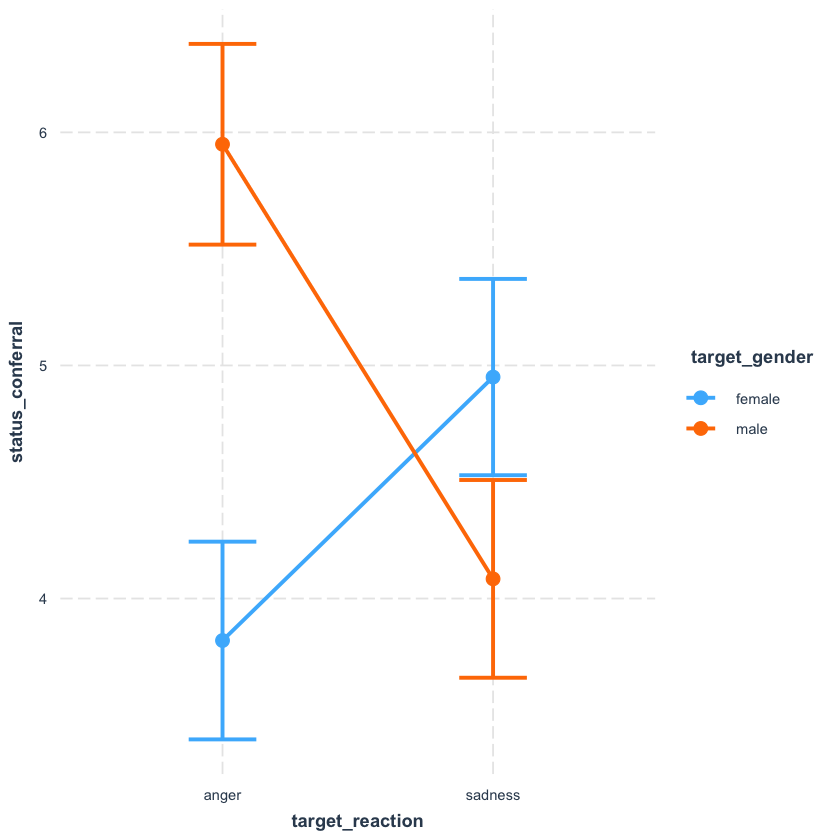

In [29]:
cat_plot(interaction_model, pred = target_reaction, modx = target_gender, geom = 'line')

In addition, there are some weird bars around the estimates for each group. While your first instinct is to think of these as the range or IQR of the data in these groups, that's not quite right. These are something called the standard error of the estimate, which we'll learn about next chapter. For now, to simplify this visualization, we can take these away by setting the ```interval = FALSE``` optional argument. 

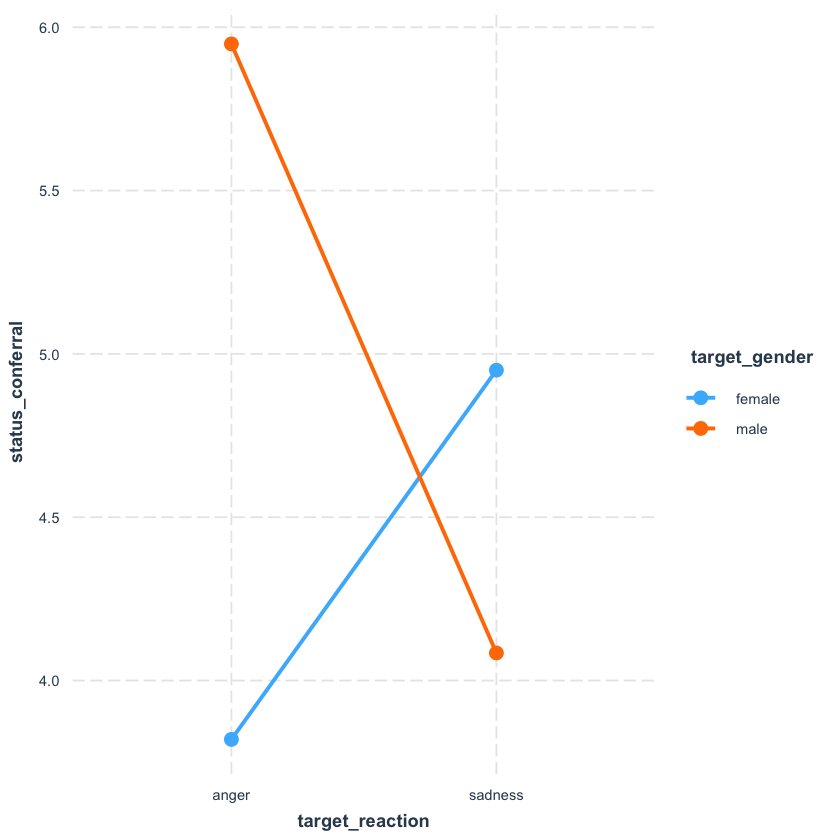

In [30]:
cat_plot(interaction_model, pred = target_reaction, modx = target_gender, 
         geom = 'line', interval = FALSE)

We now have something that looks more like the other interaction plots we built.
 
What happens if we also add the ```plot.points = TRUE``` argument to this ```cat_plot()``` command?

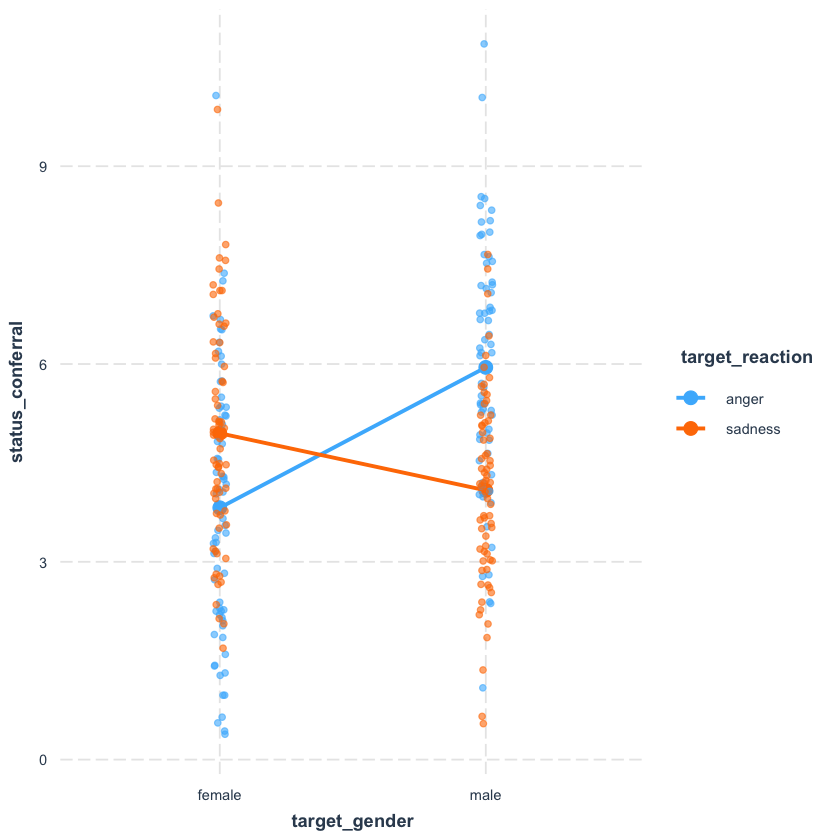

In [27]:
#Try showing the data points in a cat_plot() visualization


## 14.9 Types of interactions

Visualization helps us see the meaning of the interaction effect. We can see what the simple slopes are within one value of the moderator, and we can see that the bigger the difference in these slopes, the stronger the interaction effect is.

Visualizing interactions also helps us see that there are different *kinds* of interactions. First, in **attentuation interactions**, the direction of the simple effect in each level of the moderator is the same. We saw an example of an attentuation interaction in the dose x sex interaction of the cholesterol data. Even though the effect of the drug dose was weaker in female subjects than male subjects, the slope of the effect of drug dose for both groups was still negative. Overall, increasing drug dose is associated with reduced cholesterol. It's just that in female subjects, the strength of this effect is weaker or attenuated compared to the effect in male subjects.

Another kind of interaction is a **knock-out interaction**. Imagine a scenario where you had test subjects stand outside for up to an hour, either wearing or not wearing sunscreen. If we plotted the interaction between minutes outside and sunscreen wearing on amount of sunburn subjects received, we'd see a positive relationship between minutes outside and amount of sunburn for participants without suncreen. This simple slope would be positive. But for the sunscreen group (if they had a sufficient SPF of course), there would be no difference in their sunburn levels no matter how many minutes they were outside. In other words, there would be no effect of time spent outside on sunburn levels; the effect was "knocked out" by putting on sunscreen. The simple slope in this group would be a flat line.

Finally, there are **crossover interactions**. This is a situation like the interaction between target gender and target reaction in the Brescoll et al. 2008 data. In a crossover interaction, the impact of including a moderator is that the direction of the effect flips. While men receive more status when expressing anger vs. sadness (a negative slope in the above plot) women receive less status when expressing anger vs. sadness (a positive slope in the above plot). There is an effect of emotion reaction type in both gender categories, but the effect is opposite. 

<img src="images/ch14-interactiontypes.png" width="800">

*[Image source](https://davidbaranger.com/2019/08/06/interaction-analyses-how-large-a-sample-do-i-need-part-3/)*

## 14.10 Choosing the best model form

In just a few chapters, we've learned about so many model forms - simple group model, simple regression, multivariable models, and now interaction models. It may start to feel overwhelming to know what model structure you should choose for any particular research question. 

Indeed, it is not an easy task. We are trying to understand the data generation process as best we can, in terms of what explanatory variables are included and how they relate to an outcome, but human psychology is very complex and we're almost never sure about what the best model truly is. Is there an interaction? Should you control for something? Researchers argue over these details every day. It's important that you understand the breadth of available models, and some are more obviously wrong than others, but choosing the absolute best one is a difficult feat. 

It is important to get comfortable with not always being right, and with having opinions that are different than other people. To pick a model structure to work with, start with what you think makes the most sense given what you already know about the topic you are trying to study. Then collect some data, evaluate how right or wrong you are, and update your theories accordingly. This is how science advances.

If you don't have a strong idea about the true data generation process, you may be tempted to fit many different versions of a model and then compare the amount of error in each one. After all, that's how we were comparing models in this very chapter. However, we did that here just for demonstration purposes. As it turns out, practices like testing many models with the same data and picking the best one based on what *that sample of data* tells you is a form of overfitting, and leads to conclusions that don't replicate in other data samples. This is part of what lead to the [Replication Crisis](https://en.wikipedia.org/wiki/Replication_crisis) in psychology. 

To compare models more robustly, there are some techniques you can practice. If you have an idea about what the likely best model is, you can **pre-register** that idea. A preregistration is when you write down, ideally somewhere public like the repository of the [Open Science Framework](https://osf.io/), what you plan to do in your research and what model specification you are going to test. That way, you can't hide from when your model is maybe not as good as you were hoping. You have to face whether or not this performance refutes your hypotheses, rather than making up a new hypothesis in light of the data and claiming you were right all along (this is a bad practice called HARKing - Hypothesizing After Results are Known). 

If you don't have a strong hypothesis yet and you're not ready to pre-register, you can do what's called **exploratory analysis**. This is when you do test out many models to see which has the best fit. But, you can't stop there. At this point, you wouldn't know if your best model is a good reflection of the data generation process, or just overfit for this dataset in particular. The next step is to then do **confirmatory analysis** with a new, fresh set of data. That way, you can investigate if your model replicates and still has good performance no matter the data. 

If your dataset is large enough, you can do both exploratory and confirmatory analysis without running a whole new study. You can split your data in half, find the best fitting model in one half, then replicate that model in the other half. If your replication is pretty similar to the original performance in the first half, you've successfully avoided overfitting. 

What makes a dataset big enough to run an internal replication, rather than needing to collect a whole new dataset? We'll talk more about that in chapter 17. 

## Chapter summary

After reading this chapter, you should be able to: 
- Understand the difference between main effects and interactions
- Interpret coefficients in an interaction model no matter the predictor type
- Fit an interaction model in R
- Plot an interaction model
- Identify different types of interactions based on a visualization

[Next: Chapter 15 - Models with Categorical Outcomes](https://colab.research.google.com/github/smburns47/Psyc158/blob/main/chapter-15.ipynb)